# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aliyyah Nasywa R. Sangadji
- **Email:** aliyahnasywasangadji@gmail.com
- **ID Dicoding:** aliyyahnasywa

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
- Bagaimana distribusi peminjaman sepeda pada akhir pekan dibandingkan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [28]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [29]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- membuat data pertama yaitu day.csv yang berbentuk tabel menjadi sebuah Data Frame
- membuat data kedua yaitu hour.csv yang berbentuk tabel menjadi sebuah Data Frame

### Assessing Data

In [30]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [31]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [32]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [33]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [34]:
# Assess missing values
def assess_missing_values(df, name):
    missing = df.isnull().sum()
    print(f"Missing Values in {name}:")
    print(missing[missing > 0], "\n")

assess_missing_values(day_df, "Day")
assess_missing_values(hour_df, "Hour")

Missing Values in Day:
Series([], dtype: int64) 

Missing Values in Hour:
Series([], dtype: int64) 



In [35]:
#Check for Duplicates
def check_duplicates(df, name):
    duplicates = df.duplicated().sum()
    print(f"Jumlah duplikasi pada {name}: {duplicates}\n")

check_duplicates(day_df, "Day")
check_duplicates(hour_df, "Hour")

Jumlah duplikasi pada Day: 0

Jumlah duplikasi pada Hour: 0



**Insight:**
- untuk data day.csv tidak terdapat missing value dan juga duplicated data, tetapi terdapat kesalahan tipe data untuk kolom dteday
- untuk data hour.csv tidak terdapat missing value dan juga duplicated data, tetapi terdapat kesalahan tipe data untuk kolom dteday

### Cleaning Data

In [36]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [37]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [38]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [39]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- jadi untuk mengatasi permasalahan pada day_df & hour_df, yaitu dengan mengganti tipe data pada kolom dteday menjadi datatime, karena dteday merupakan tanggal yang lebih efisien menggunakan datatime sebagai tipe data nya.
- Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas.

## Exploratory Data Analysis (EDA)

### Explore ...

In [40]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [41]:
day_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                                
         max   min         mean          std
season                                      
1       7836   431  2604.132597  1399.942119
2       8362   795  4992.331522  1695.977235
3       8714  1115  5644.303191  1459.800381
4       8555    22  4728.162921  1699.615261

In [42]:
day_df.groupby(by="holiday").agg({
    "cnt" : ["max", "min", "std", "mean"]
})

cnt                                
          max   min          std         mean
holiday                                      
0        8714    22  1929.013947  4527.104225
1        7403  1000  2103.350660  3735.000000

In [43]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [44]:
hour_df.groupby(by="season").agg({
    "cnt": ["max", "min", "std", "mean"]
})

cnt                            
        max min         std        mean
season                                 
1       801   1  119.224010  111.114569
2       957   1  188.362473  208.344069
3       977   1  197.711630  236.016237
4       967   1  182.967972  198.868856

In [45]:
hour_df.groupby(by="holiday").agg({
    "cnt": ["max", "min", "std", "mean"]
})

cnt                           
         max min         std       mean
holiday                                
0        977   1  181.981435  190.42858
1        712   1  156.757478  156.87000

**Insight:**
- pada pertanyaan pertama yaitu season
 1. pada day_df menunjukan bahwa  Jumlah total penyewaan sepeda (cnt) paling tinggi menyewa sepeda pada musim ke-3 (musim panas) karena nilai max, min, mean, dan std paling tinggi
 2. pada hour_df menunjukan bahwa  Jumlah total penyewaan sepeda (cnt) paling tinggi menyewa sepeda pada musim ke-3 (musim panas) juga karena nilai max, min, mean, dan std paling tinggi, dan nilai terendah pada musim ke-2 (musim dingin)
- pada pertanyaan kedua yaitu distribusi penyewaan sepeda pada hari kerja atau hari libur
 1. pada day_df Jumlah total penyewaan sepeda (cnt) paling tinggi pada nilai 0 yaitu workingday (hari bukan libur)
 2. pada hour_df Jumlah total penyewaan sepeda (cnt) paling tinggi pada nilai 0 yaitu workingday (hari bukan libur)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

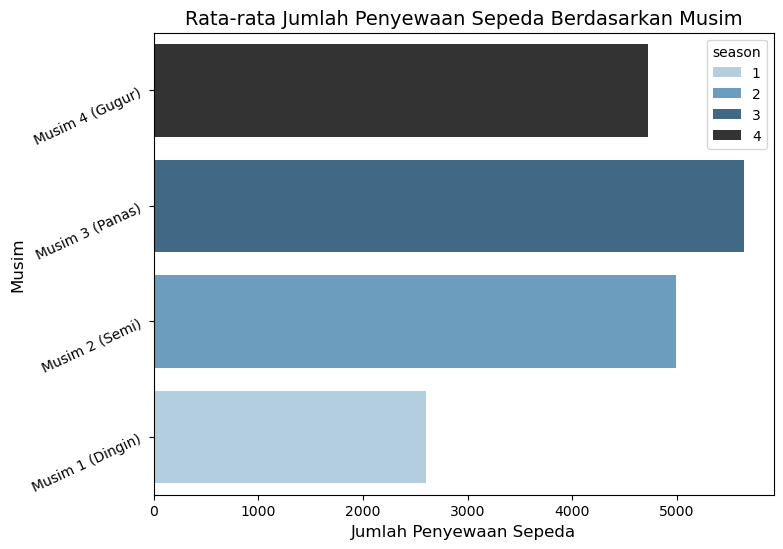

In [46]:
plt.figure(figsize=(8, 6))
sns.barplot(data=day_df, x="cnt", y="season", orient='h', hue="season", palette="Blues_d", errorbar=None)
plt.title("Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Musim", fontsize=14)
plt.xlabel("Jumlah Penyewaan Sepeda", fontsize=12)
plt.ylabel("Musim", fontsize=12)
plt.yticks([0, 1, 2, 3], ["Musim 1 (Dingin)", "Musim 2 (Semi)", "Musim 3 (Panas)", "Musim 4 (Gugur)"], rotation=25)
plt.ylim(-0.5, 3.5)  # Atur batas y agar barplot tidak terpotong
plt.show()

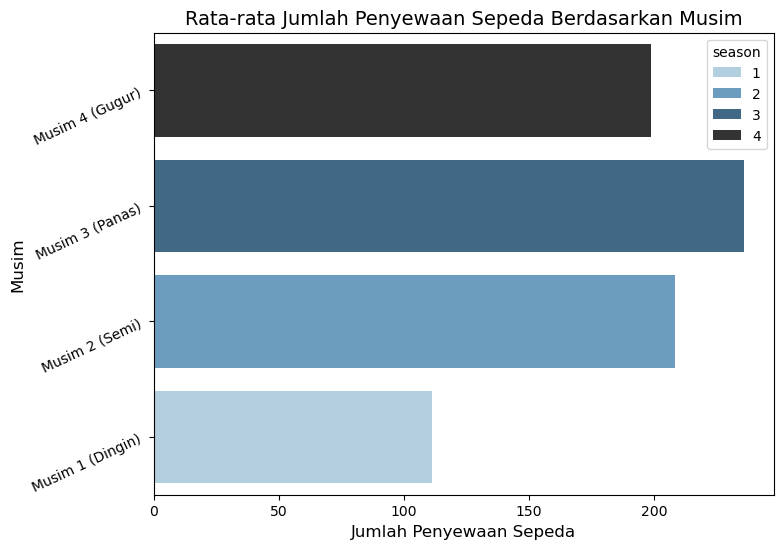

In [47]:
plt.figure(figsize=(8, 6))
sns.barplot(data=hour_df, x="cnt", y="season", orient='h', hue="season", palette="Blues_d", errorbar=None)
plt.title("Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Musim", fontsize=14)
plt.xlabel("Jumlah Penyewaan Sepeda", fontsize=12)
plt.ylabel("Musim", fontsize=12)
plt.yticks([0, 1, 2, 3], ["Musim 1 (Dingin)", "Musim 2 (Semi)", "Musim 3 (Panas)", "Musim 4 (Gugur)"], rotation=25)
plt.ylim(-0.5, 3.5)  # Atur batas y agar barplot tidak terpotong
plt.show()


### Pertanyaan 2: Bagaimana distribusi peminjaman sepeda pada akhir pekan dibandingkan hari kerja?

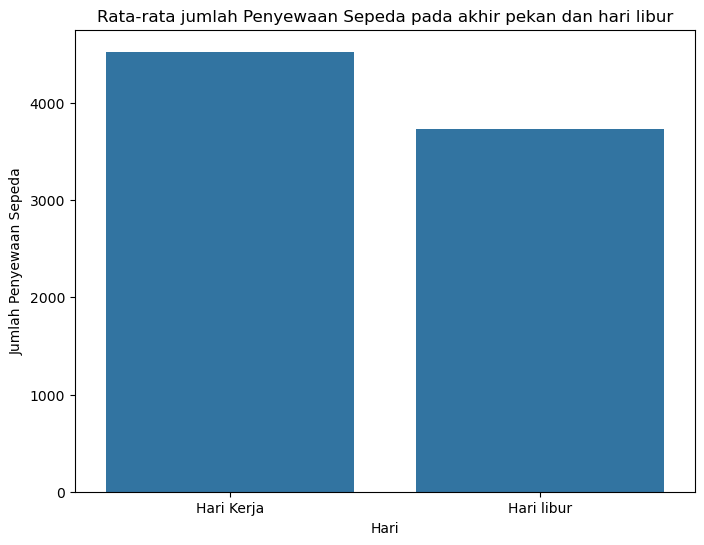

In [48]:
plt.figure(figsize=(8, 6))
sns.barplot(data=day_df, x="holiday", y="cnt", errorbar=None)
plt.title("Rata-rata jumlah Penyewaan Sepeda pada akhir pekan dan hari libur")
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks([0, 1], ["Hari Kerja", "Hari libur"])
plt.show()

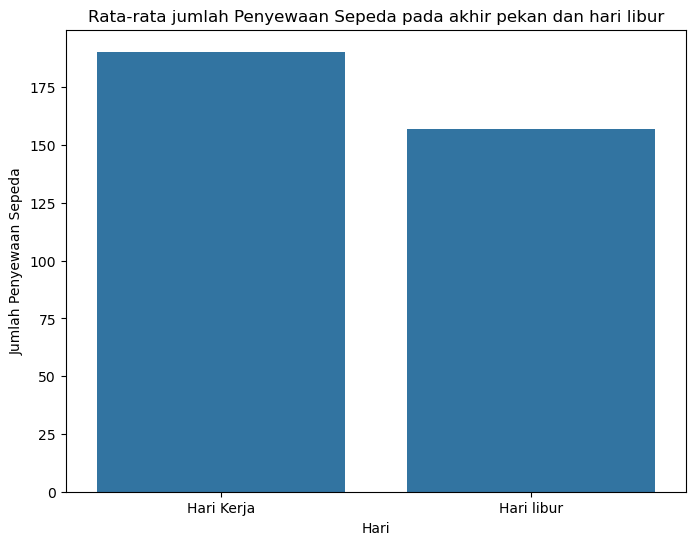

In [49]:
plt.figure(figsize=(8, 6))
sns.barplot(data=hour_df, x="holiday", y="cnt", errorbar=None)
plt.title("Rata-rata jumlah Penyewaan Sepeda pada akhir pekan dan hari libur")
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks([0, 1], ["Hari Kerja", "Hari libur"])
plt.show()

**Insight:**
- pada pertanyaan pertama untuk day_df dan hour_df menunjukan bahwa saat musim 3 (panas), jumlah penyewaan sepeda meningkat dibuktikan dengan barplot yang lebih panjang kekanan
- pada pertanyaan kedua untuk day_df dan hour_df terbukti dari hasil grafik barplot bahwa distribusi jumlah penyewaan sepeda lebih meningkat saat workingday(nilai:0)

## Analisis Lanjutan (Opsional)

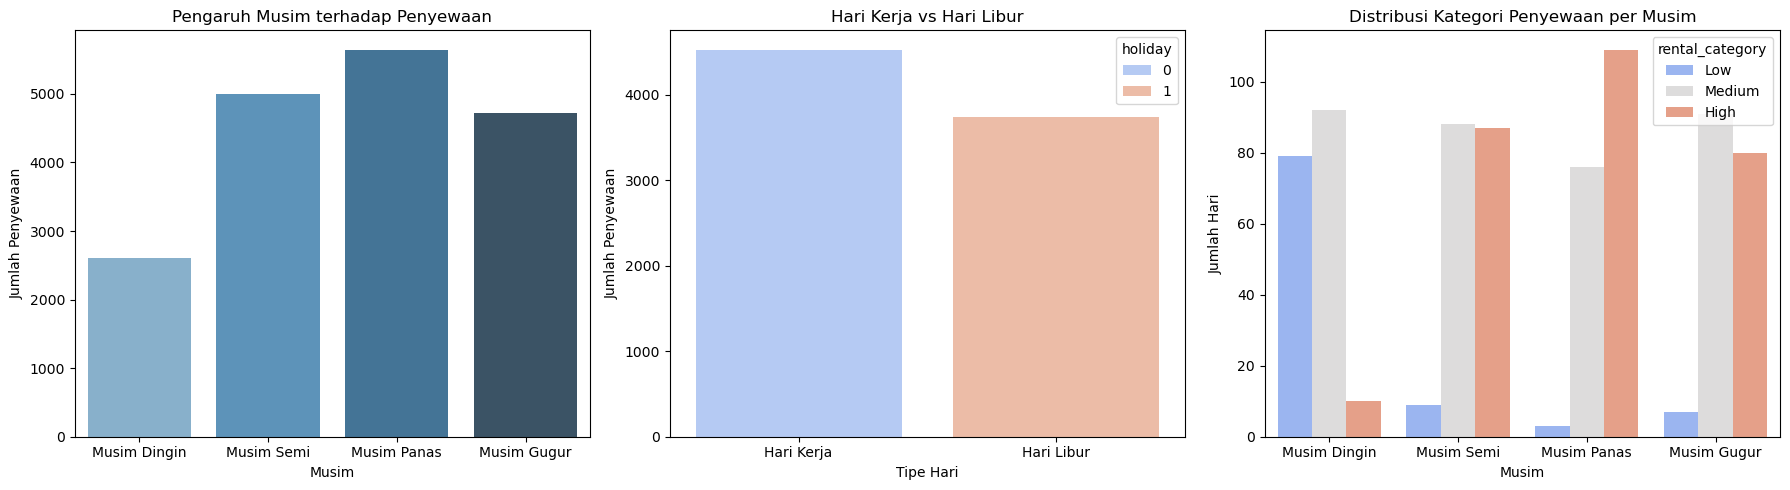

In [50]:
day_df = pd.read_csv("data/day.csv")
season_mapping = {1: "Musim Dingin", 2: "Musim Semi", 3: "Musim Panas", 4: "Musim Gugur"}
day_df["season"] = day_df["season"].map(season_mapping)
day_df["day_type"] = day_df["holiday"].map({1: "Hari Libur", 0: "Hari Kerja"})

# *** KATEGORISASI JUMLAH PENYEWAAN ***
def categorize_rentals(cnt):
    if cnt < 2000:
        return "Low"
    elif 2000 <= cnt < 5000:
        return "Medium"
    else:
        return "High"

day_df["rental_category"] = day_df["cnt"].apply(categorize_rentals)

# *** ANALISIS VISUAL ***
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

sns.barplot(x="season", y="cnt", data=day_df, hue="season", palette="Blues_d", errorbar=None, ax=axes[0])
axes[0].set_title("Pengaruh Musim terhadap Penyewaan")
axes[0].set_xlabel("Musim")
axes[0].set_ylabel("Jumlah Penyewaan")

sns.barplot(x="day_type", y="cnt", data=day_df, hue="holiday", palette="coolwarm", errorbar=None, ax=axes[1])
axes[1].set_title("Hari Kerja vs Hari Libur")
axes[1].set_xlabel("Tipe Hari")
axes[1].set_ylabel("Jumlah Penyewaan")

sns.countplot(x="season", hue="rental_category", data=day_df, palette="coolwarm", ax=axes[2])
axes[2].set_title("Distribusi Kategori Penyewaan per Musim")
axes[2].set_xlabel("Musim")
axes[2].set_ylabel("Jumlah Hari")

plt.tight_layout()
plt.show()


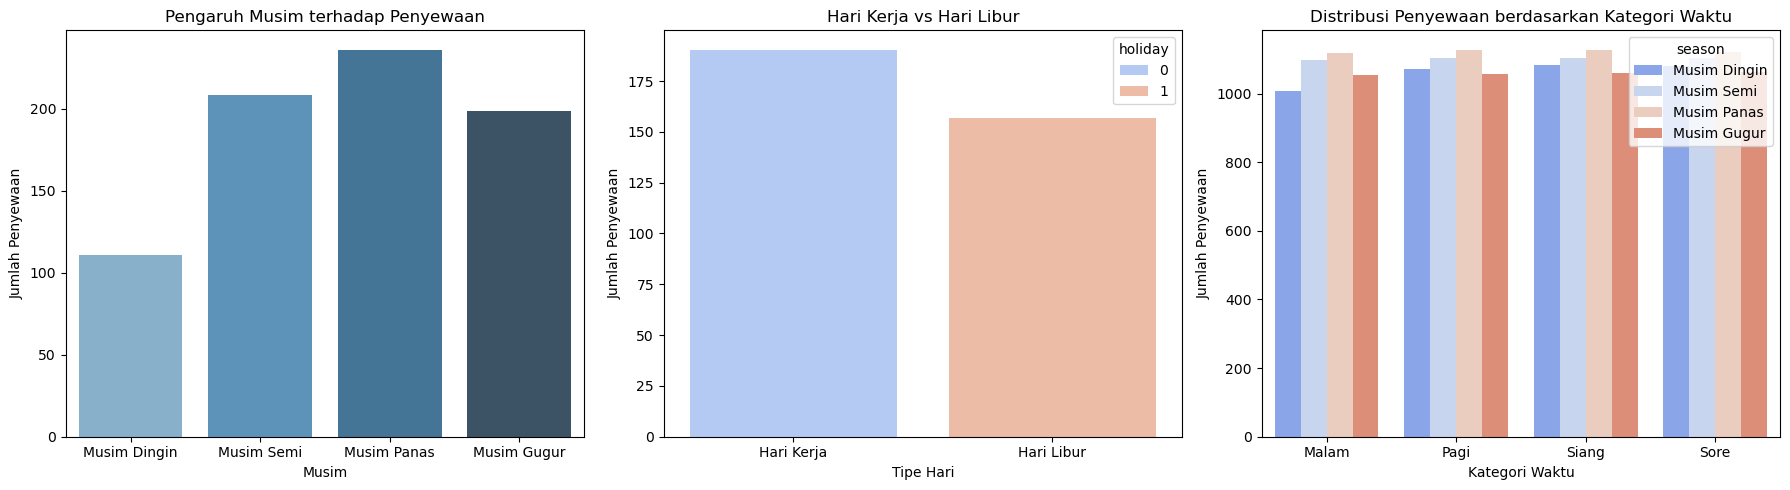

In [51]:
hour_df = pd.read_csv("data/hour.csv")
season_mapping = {1: "Musim Dingin", 2: "Musim Semi", 3: "Musim Panas", 4: "Musim Gugur"}
hour_df["season"] = hour_df["season"].map(season_mapping)
hour_df["day_type"] = hour_df["holiday"].map({1: "Hari Libur", 0: "Hari Kerja"})

# *** KATEGORISASI WAKTU PER JAM ***
def categorize_hour(hr):
    if 0 <= hr < 6:
        return "Malam"
    elif 6 <= hr < 12:
        return "Pagi"
    elif 12 <= hr < 18:
        return "Siang"
    else:
        return "Sore"

hour_df["time_category"] = hour_df["hr"].apply(categorize_hour)

# *** ANALISIS VISUAL ***
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

sns.barplot(x="season", y="cnt", data=hour_df, hue="season", palette="Blues_d", errorbar=None, ax=axes[0])
axes[0].set_title("Pengaruh Musim terhadap Penyewaan")
axes[0].set_xlabel("Musim")
axes[0].set_ylabel("Jumlah Penyewaan")

sns.barplot(x="day_type", y="cnt", data=hour_df, hue="holiday", palette="coolwarm", errorbar=None, ax=axes[1])
axes[1].set_title("Hari Kerja vs Hari Libur")
axes[1].set_xlabel("Tipe Hari")
axes[1].set_ylabel("Jumlah Penyewaan")

sns.countplot(x="time_category", hue="season", data=hour_df, palette="coolwarm", ax=axes[2])
axes[2].set_title("Distribusi Penyewaan berdasarkan Kategori Waktu")
axes[2].set_xlabel("Kategori Waktu")
axes[2].set_ylabel("Jumlah Penyewaan")

plt.tight_layout()
plt.show()

## Conclusion

- Ternyata pengaruh musim sangat berpengaruh dalam penyewaan sepeda. Terbukti dari beberapa analisis yang telah dilakukan diatas bahwa pada saat Musim Panas (musim 3) jumlah penyewaan sepeda meningkat berbeda dengan ketiga musim lainnya.
1. pada day_df, total penyewaan sepeda pada musim 3 (musim panas) adalah max=8714, min=1115, mean(rata-rata)=5644.303191, dan std=1459.800381
2. sedangkan pada hour_df juga total penyewaan sepeda paling banayak terdapat di musim 3(musim panas) yaitu dengan nilai max=977, min=1, mean(rata-rata)=197.711630, dan std=236.016237

- Distribusi peminjaman sepeda pada Hari Kerja dan Hari Libur dengan menggunakan kolom Holiday terbukti bahwa dari kedua data day_df dan hour_df, bahwa pada saat nilai 0 atau hari kerja, jumlah distribusi penyewaan sepeda meningkat dibandingkan dengan hari libur.
1. pada day_df,distribusi peminjaman sepeda paling banyak pada hari Kerja (nilai 0) yaitu dengan nilai max=8714, min=22, std=1929.013947, dan mean=4527.104225
2. sedangkan pada hour_df distribusi peminjaman sepeda paling banyak juga terjadi pada hari Kerja (nilai 0) yaitu dengan nilai max=977,	min=1, std=181.981435, dan mean=190.42858

In [52]:
all_df = pd.concat([day_df, hour_df], ignore_index=True)
all_df.to_csv("all_data.csv", index=False)
